SF Salaries Exercise
Explore San Francisco city employee salary data.

Overview
One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.

Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

Resourses
Pandas API Reference

NumPy Reference

Visualization with Seaborn

In [43]:
#init 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np

#load data csv
sal = pd.read_csv('./Salaries.csv')


In [6]:
#find out how many entries there are
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [9]:
#average BasePay
np.mean(sal.BasePay)

66325.44884050643

In [10]:
#min BasePay
sal.BasePay.min()

-166.01

In [11]:
#max BasePay
sal.BasePay.max()

319275.01

In [17]:
#OvertimePay : average, min, max 
#sal.groupby('OvertimePay').agg('min','max')
print ('OvertimePay :')
[np.mean(sal.OvertimePay),sal.OvertimePay.min(),sal.OvertimePay.max()]

OvertimePay :


[5066.059886444622, -0.01, 245131.88]

In [48]:
#Joseph Driscoll list
joseph = sal[(sal['EmployeeName'] == 'JOSEPH DRISCOLL') | (sal['EmployeeName'] == 'Joseph Driscoll')]
joseph

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
24,25,JOSEPH DRISCOLL,"CAPTAIN, FIRE SUPPRESSION",140546.86,97868.77,31909.28,NaN,270324.91,270324.91,2011,NaN,San Francisco,NaN
36198,36199,Joseph Driscoll,"Captain, Fire Suppression",145658.98,114513.29,28743.36,42919.16,288915.63,331834.79,2012,NaN,San Francisco,NaN


In [51]:
#Joseph Driscoll Make (including benefits)
joseph = sal[(sal['EmployeeName'] == 'JOSEPH DRISCOLL') | (sal['EmployeeName'] == 'Joseph Driscoll')]
joseph['TotalPayBenefits']

24       270324.91
36198    331834.79
Name: TotalPayBenefits, dtype: float64

In [58]:
#name of highest paid person (including benefits)
highest = sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()]
highest.EmployeeName

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

In [59]:
#name of lowest paid person (including benefits)
lowest = sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min()]
lowest.EmployeeName
#Minus number because he/she had some mistake so he/she have to pay for it.

148653    Joe Lopez
Name: EmployeeName, dtype: object

In [85]:
#average BasePay of all employees per year? (2011-2014)
SalPerYear['TotalPayBenefits'] = sal.groupby('Year')['TotalPayBenefits'].sum()
SalPerYear['size'] = sal.groupby('Year').size()
SalPerYear['average'] = SalPerYear['TotalPayBenefits'] / SalPerYear['size']
SalPerYear.average
#SalaryPerYear

Year
2011     71744.103871
2012    100553.229232
2013    101440.519714
2014    100250.918884
dtype: float64

In [86]:
#number of JobTitle
sal.JobTitle.nunique()

2159

In [90]:
#top 5 most common jobs
top5 = sal.JobTitle.value_counts(ascending = False)
top5[:5]

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

In [91]:
#Number of Jobs Titles were represented by only one person in 2013
sum(sal[sal['Year']==2013]['JobTitle'].value_counts()==1)

202

In [93]:
#people have the word Chief in their job title
def Chief(title):
    if 'chief' in title.lower().split():
        return True
    else:
        return False
#đếm các tên có chứa từ chief
sum(sal['JobTitle'].apply(lambda x:Chief(x)))


477

# Data Visualization

Implement seaborn's countplot with x='Year'

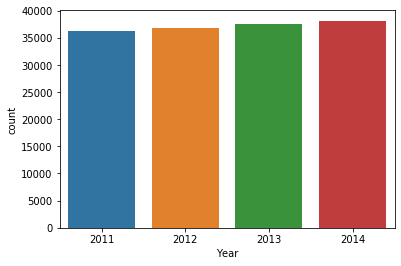

In [95]:
sns.countplot(x='Year', data = sal)

Implement seaborn's distplot for BasePay of Year 2011

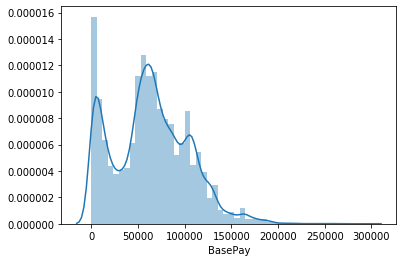

In [96]:
x = sal[sal['Year']==2011]['BasePay']
sns.distplot(x)

How about other Year?

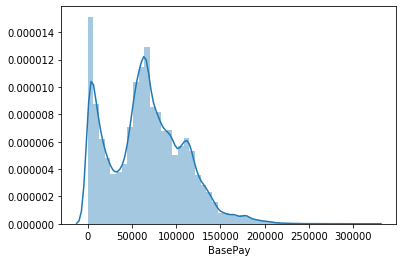

In [98]:
x = sal['BasePay']
x = x.replace(np.nan,0)
sns.distplot(x)

Visualize top 5 Jobs with BasePay, Benefits and OvertimePay

In [100]:
#
#
#